In [465]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [466]:
# Load the dataset
column_names = ["Id number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]

data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv', names=column_names)

data

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [467]:
# Check the datatypes
data.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [468]:
# remmove the Id number column
df=data.drop('Id number',axis=1)

In [469]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [470]:
column=df.columns
column

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [471]:
# Check the values count
for col in column:
    print(df[col].value_counts())
    print(df[col].nunique())
    print('------------------------')

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64
178
------------------------
Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64
142
------------------------
Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64
94
------------------------
Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64
118
------------------------
Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64
133
------------------------
K
0.00    30
0.57    12
0.56   

In [472]:
'''here we observe that all columns except Type of glass is continuous and type of glass is categorical column or this is taget variable.
we can say this is the classification problem.'''

'here we observe that all columns except Type of glass is continuous and type of glass is categorical column or this is taget variable.\nwe can say this is the classification problem.'

In [473]:
# Check the null values
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<Axes: >

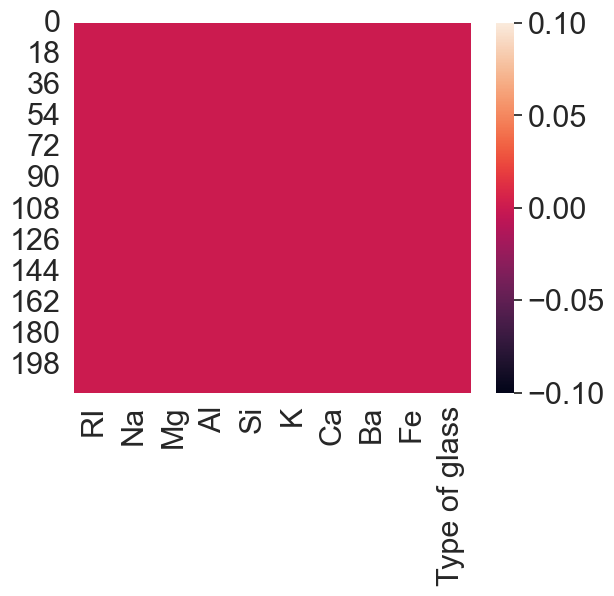

In [474]:
# Visualize the null values  with heatmap
sns.heatmap(df.isnull())

In [475]:
'''thats great there is no any null values.'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [476]:
# check the dulplicate values
# df.duplicated().sum()
duplicates=df.duplicated()
print(df[duplicates])

         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0              1


In [477]:
# remove the duplicate value
df.drop_duplicates(inplace=True)

In [478]:
# Check the again duplicate values
df.duplicated().sum()

0

In [479]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Statistics Describe

In [480]:
# describe the data
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [481]:
'''From the above code description we can observe the following
by summarising almost column is normal distributon
1.the counts of all the columns are same which means there are no missing values in the dataset.
2.mean>median(50%) then data is right skewness in total sulfur dioxide column.
3.By summarizing the data we can observe there is a huge difference b/w 75% and max in (K,Ca and
and Ba) hence there are outliers present in the data.
4.we can also notice the standard deviation,min(25%),values from his describe method
'''

'From the above code description we can observe the following\nby summarising almost column is normal distributon\n1.the counts of all the columns are same which means there are no missing values in the dataset.\n2.mean>median(50%) then data is right skewness in total sulfur dioxide column.\n3.By summarizing the data we can observe there is a huge difference b/w 75% and max in (K,Ca and\nand Ba) hence there are outliers present in the data.\n4.we can also notice the standard deviation,min(25%),values from his describe method\n'

In [482]:
# # checking the list of count of target
df["Type of glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [483]:
'''
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps
i.e window glass (classes 1-4) and non-window glass (classes 5-7). 
'''
df['Type of glass'].value_counts()

Type of glass
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

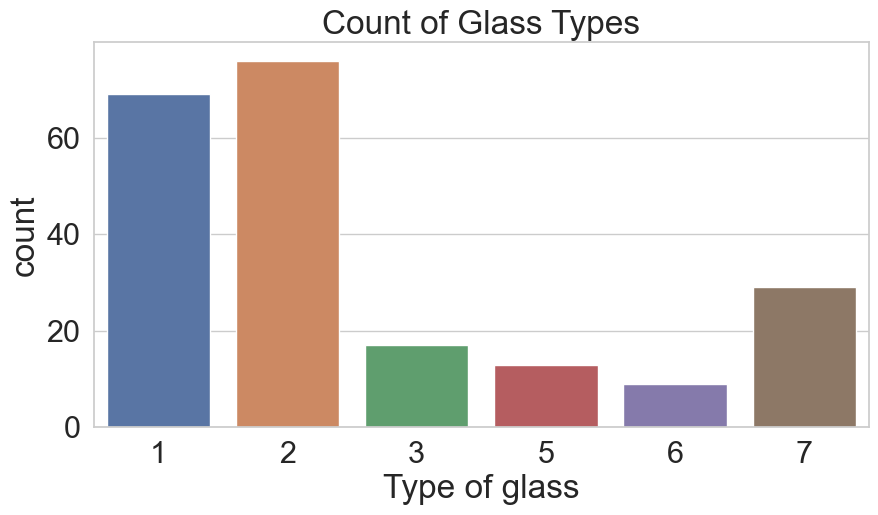

In [484]:
# Let us check how many instances of each type are there in our dataset with countplot
sns.set(style="whitegrid", font_scale=2)
plt.subplots(figsize=(10, 5))
sns.countplot(x='Type of glass', data=df).set_title('Count of Glass Types')
plt.show()

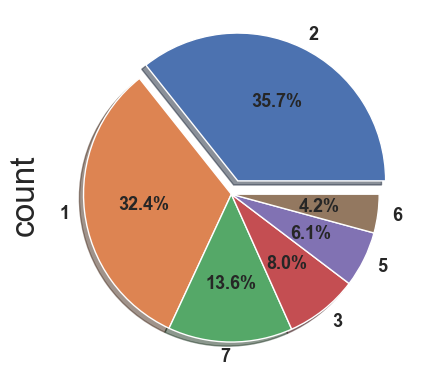

In [485]:
value_counts = df['Type of glass'].value_counts()
explode = [0.1] + [0] * (len(value_counts) - 1)

value_counts.plot.pie(explode=explode, textprops={'fontsize': 13, 'fontweight': 'bold'}, autopct='%2.1f%%', shadow=True)
plt.show()

In [486]:
# Checked  mean seemed more informative
df.groupby('Type of glass', as_index=False).mean()

,Type of glass,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


<Figure size 2500x3000 with 0 Axes>

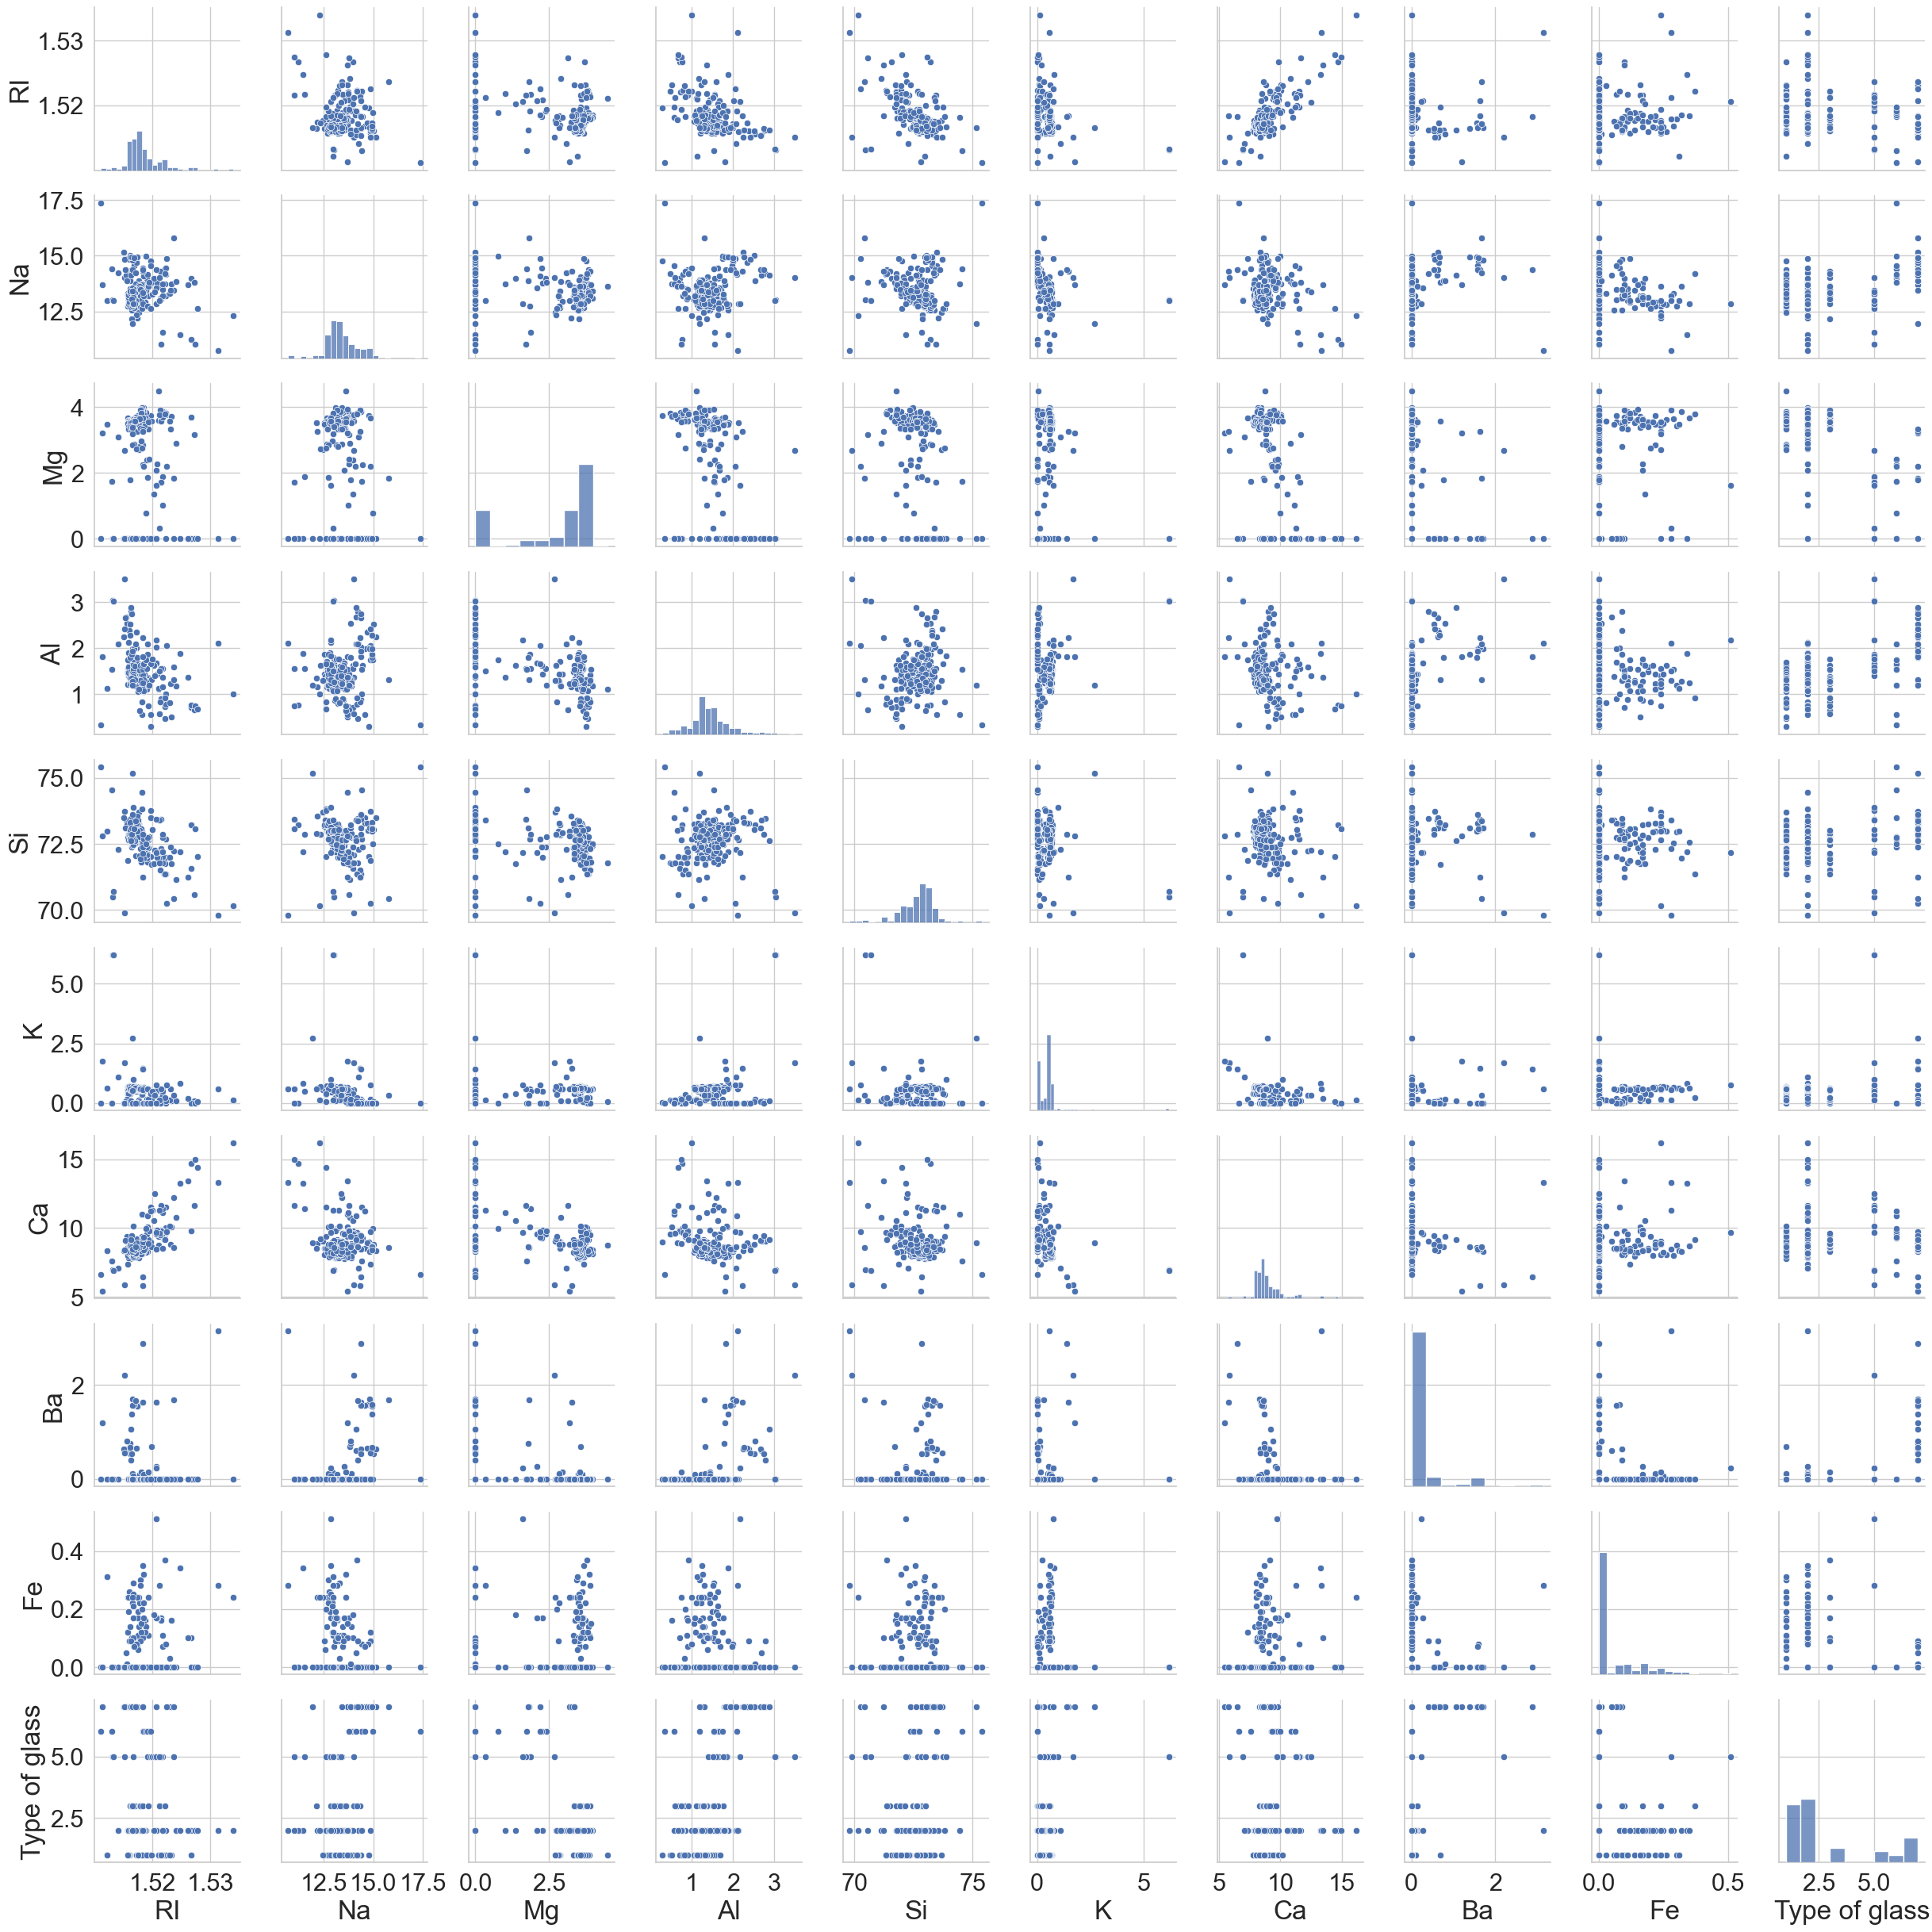

In [487]:
# Visualization with pairplot
plt.figure(figsize=(25,30))
sns.pairplot(df,palette='Dark2')
plt.show()

# Checked the Outliers

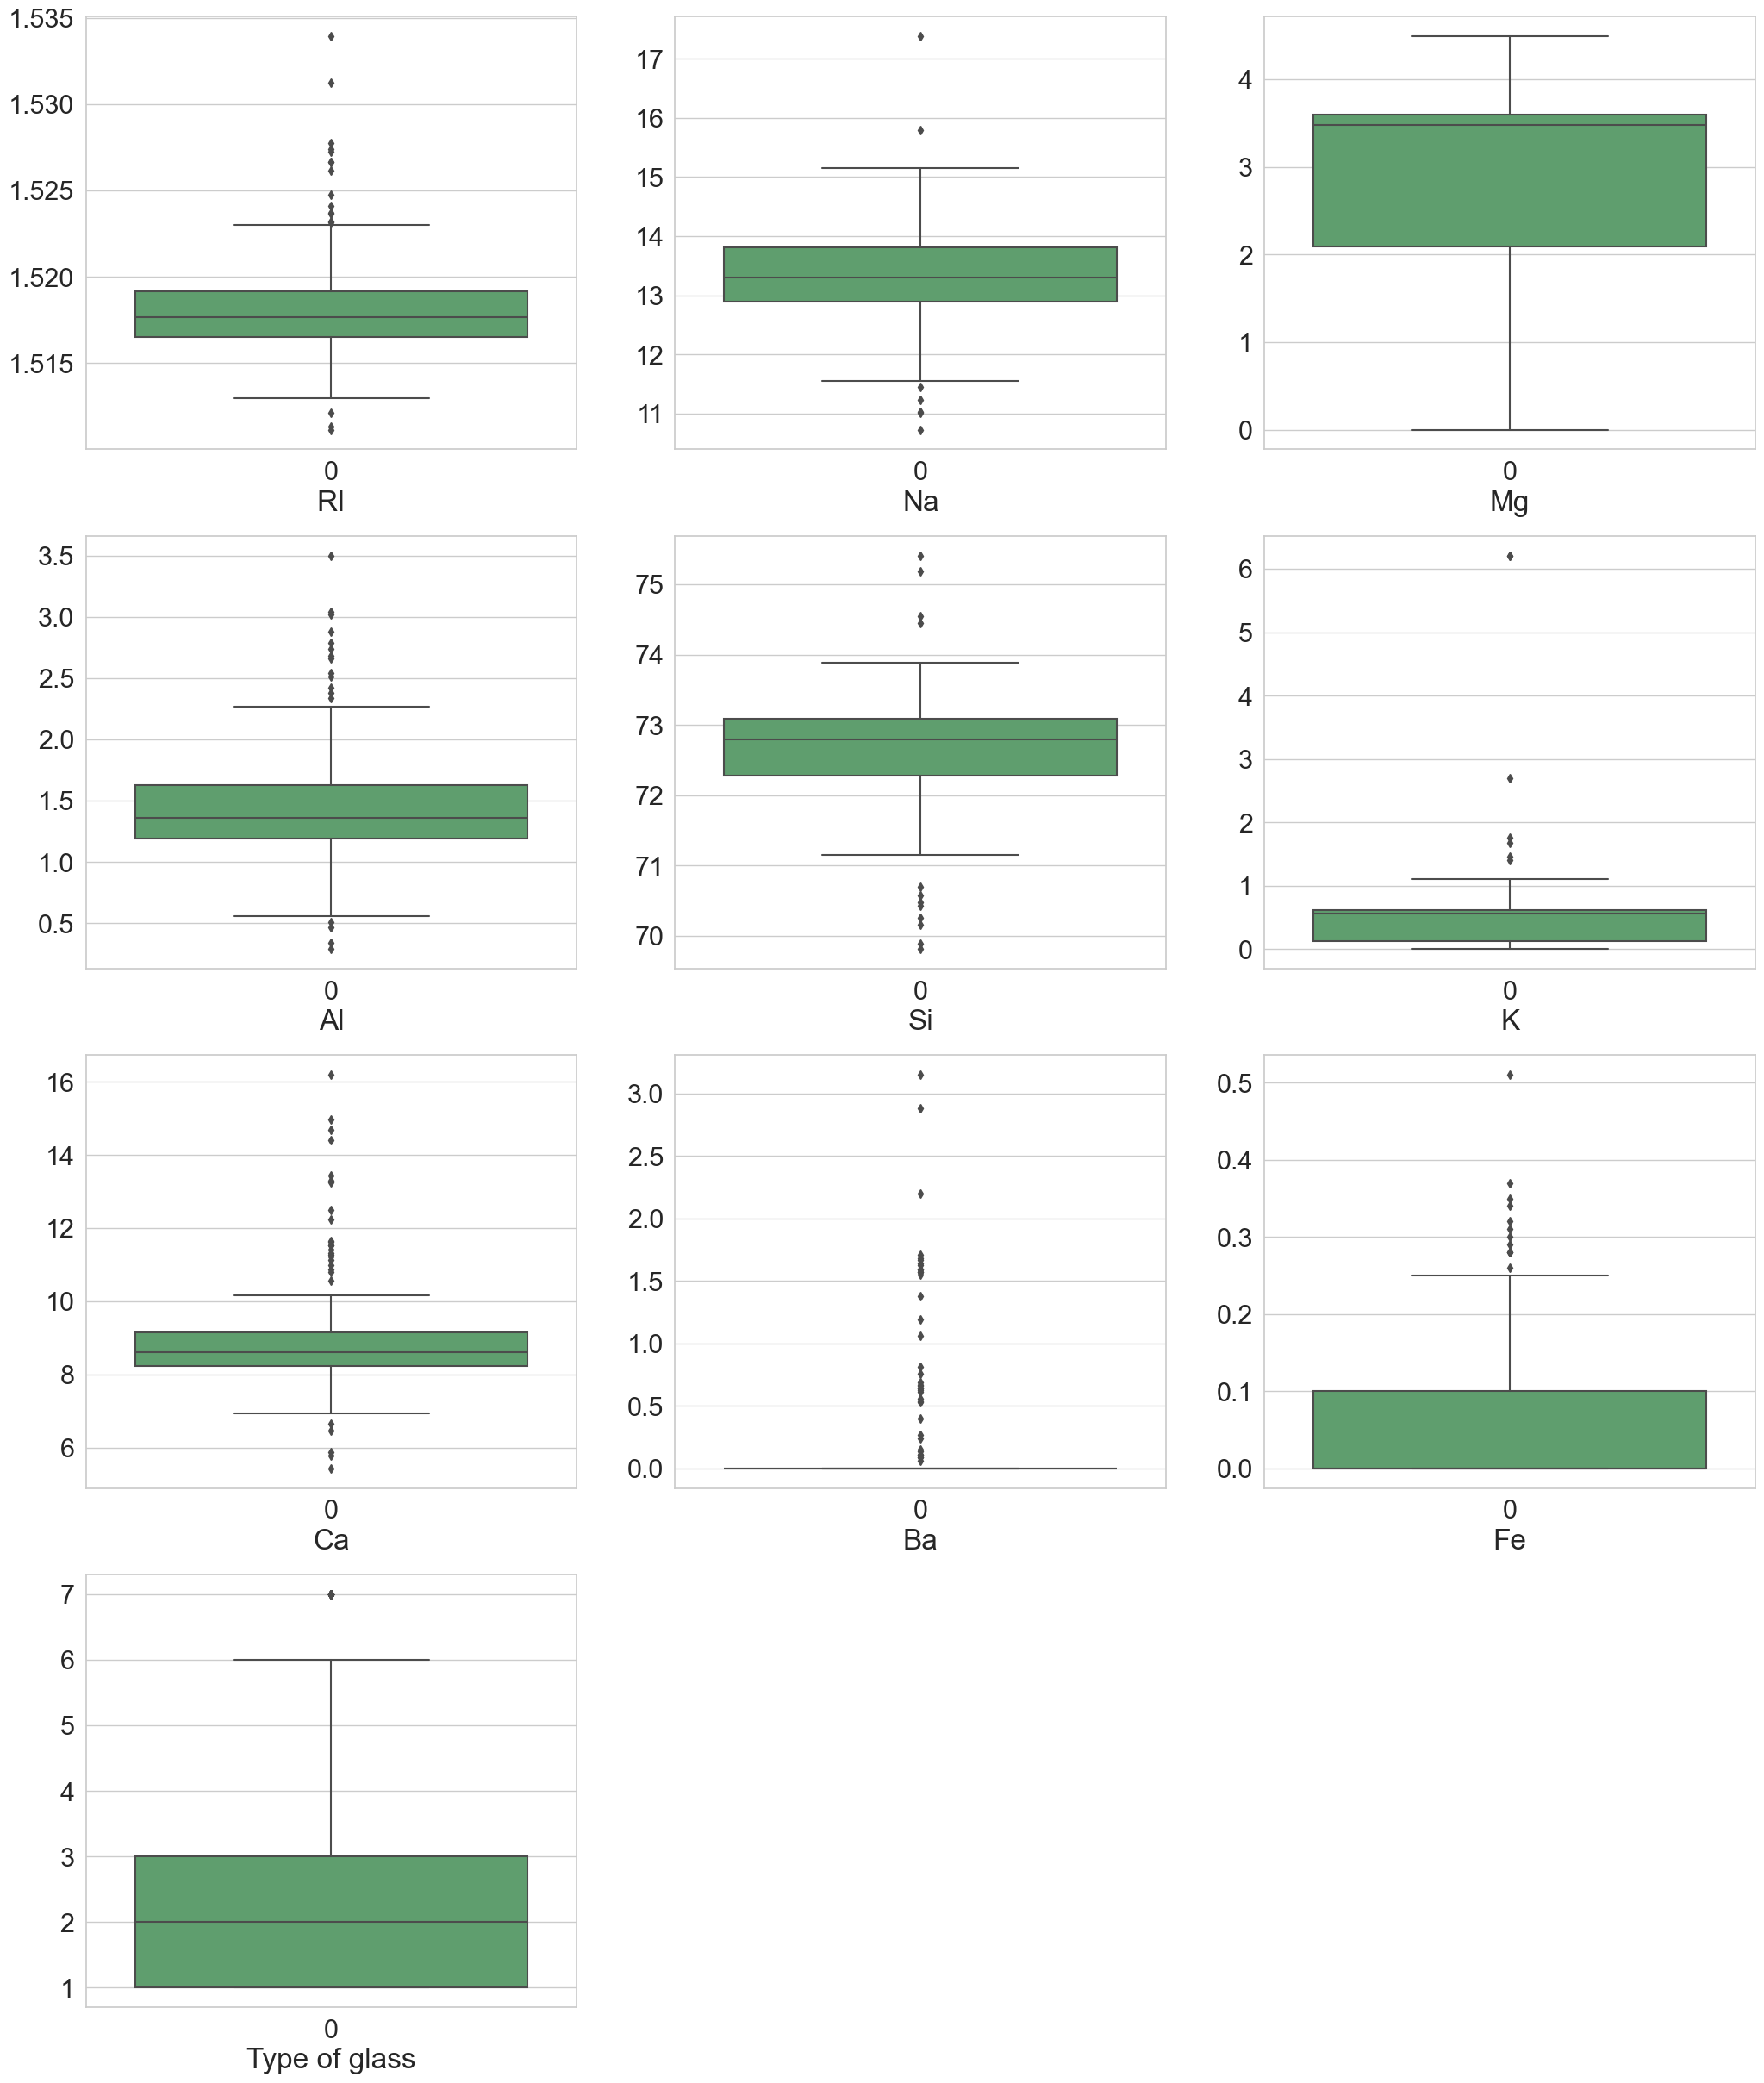

In [488]:
# check the outliers by plotting boxplot
plt.figure(figsize=(25,30))
column=1
for col in df:
    if column<=12:
        plt.subplot(4,3,column)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col)
    column +=1
plt.show()

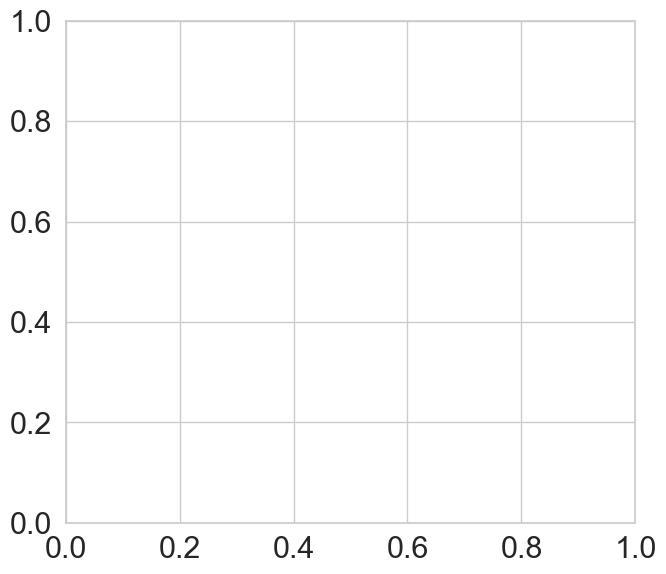

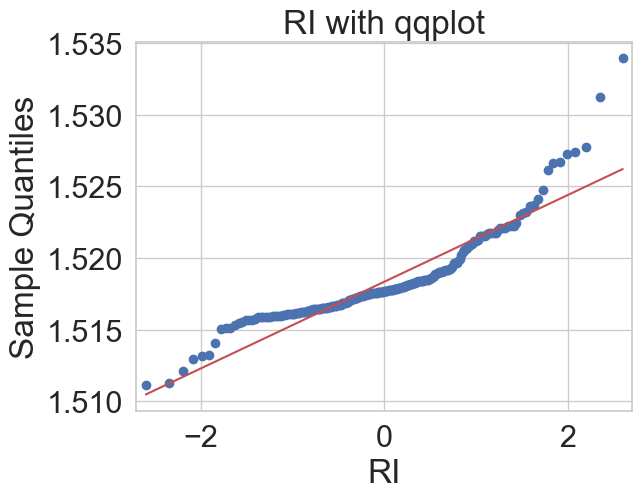

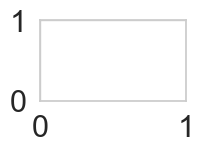

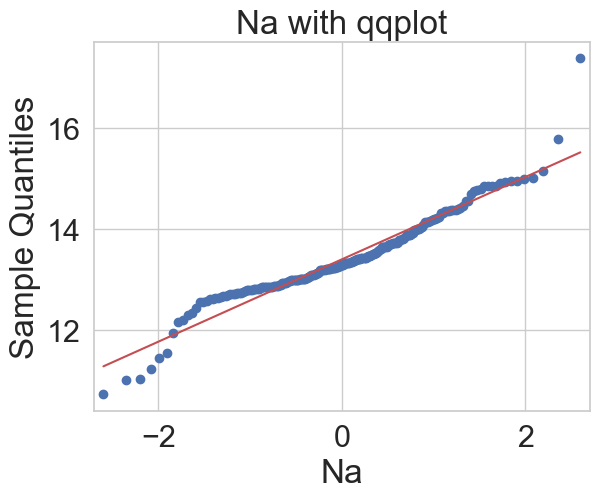

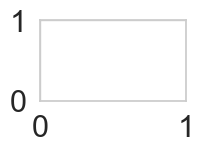

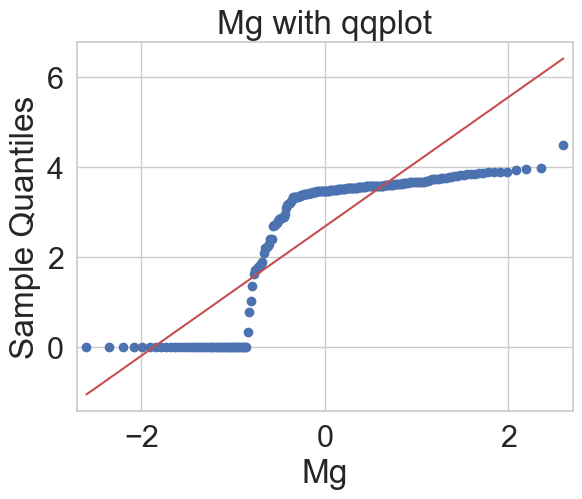

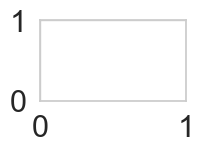

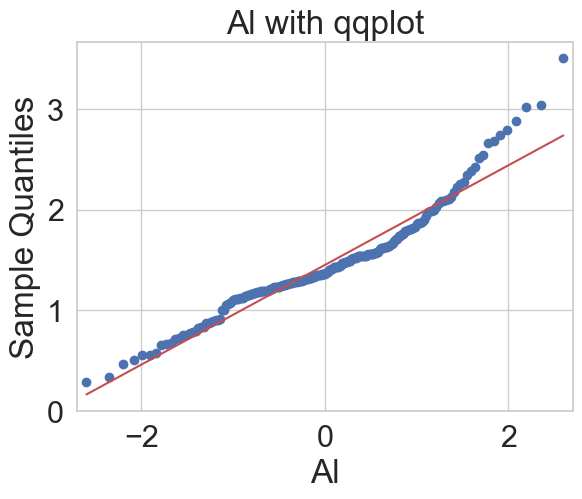

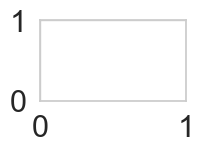

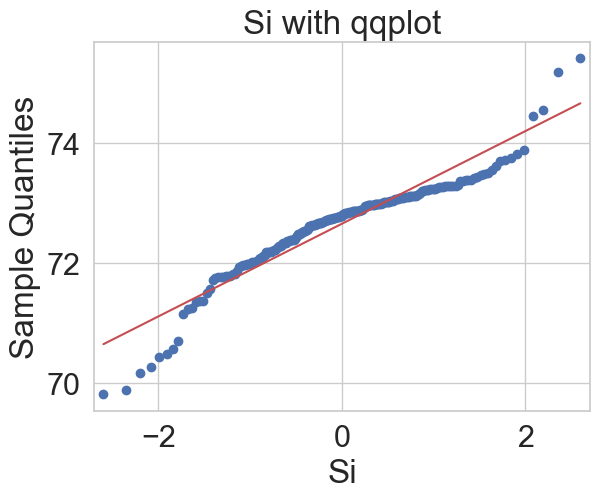

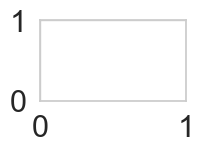

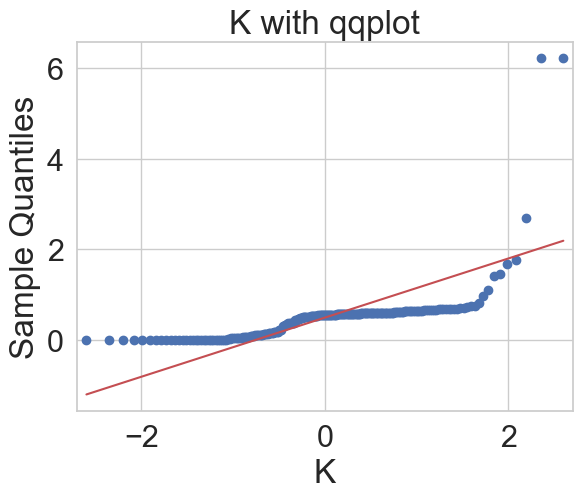

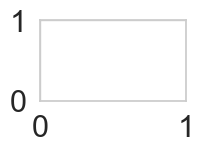

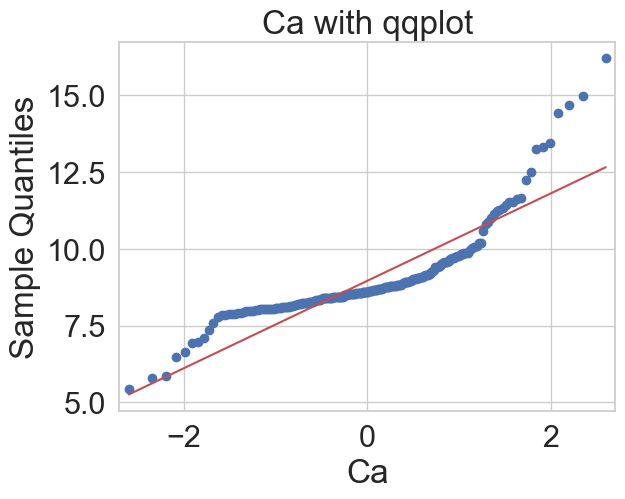

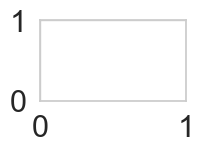

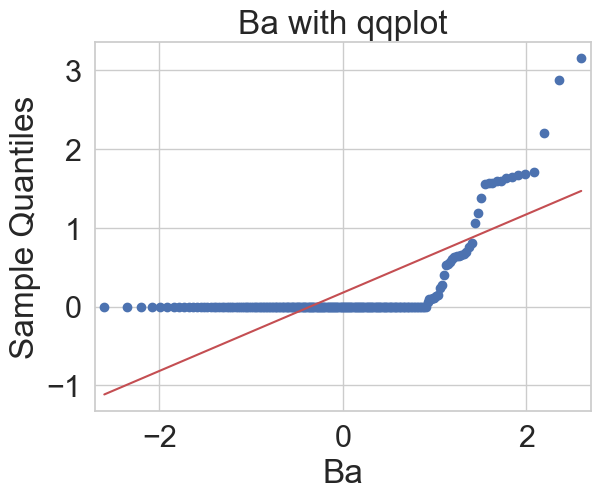

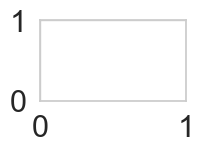

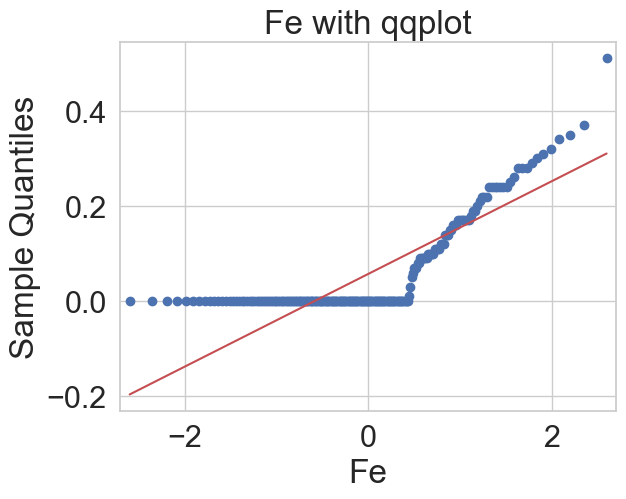

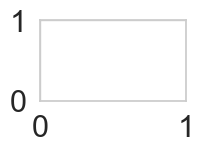

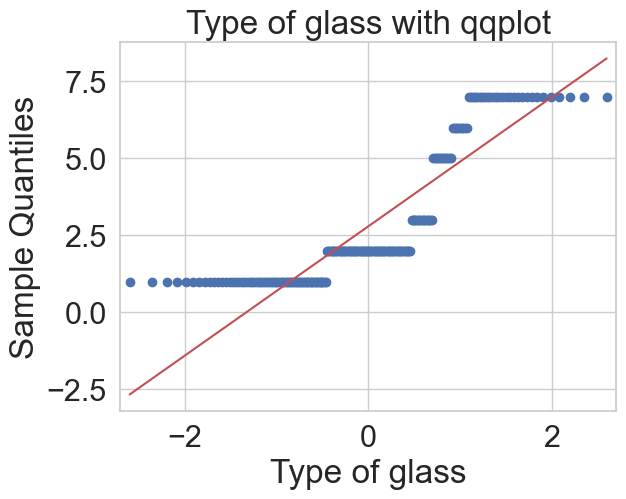

In [489]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(25,30))
column=1
for col in df:
    if column<=12:
        plt.subplot(4,3,column)
        qqplot(df[col],line='s')
        plt.xlabel(col)
        plt.title(f"{col} with qqplot")
        plt.show()
    column +=1
plt.show()

In [490]:
out_df=df

In [491]:
# So remove the Outliers with box-cox method
import scipy
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
# out_df['RI'],fitted_lambda= scipy.stats.boxcox(out_df['RI'],lmbda=None)
# out_df['RI']=np.cbrt(out_df['RI'])
# out_df['RI']=np.log(out_df['RI'])
# So we have found outlier in one bmi column

# out_features=out_df[['RI','Na','Al','Si','K','Ca','Ba','Fe']]
# z=np.abs(zscore(out_features))
# z
# sc=StandardScaler()
# out_df['RI']=sc.fit_transform(out_df['RI'].values.reshape(-1,1))
# '''with mean imputation'''
# for i in out_df['RI']:
#     q1=out_df['RI'].quantile(0.25)
#     q3=out_df['RI'].quantile(0.75)
#     iqr=q3-q1
#     lower=q1-1.5*iqr
#     upper=q3+1.5*iqr
#     if i>upper or i<lower:
#         out_df['RI']=out_df['RI'].replace(i,np.median(out_df['RI']))
# check with IQR method

def replace_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    median = np.median(column)
    column = column.apply(lambda x: median if x > upper or x < lower else x)
    return column

# Assuming out_df is your DataFrame and you want to apply this to specific columns
columns = ['RI', 'Na', 'Al','Si','K','Ca','Fe']  # replace with your column names

for col in columns:
    out_df[col] = replace_outliers(out_df[col])

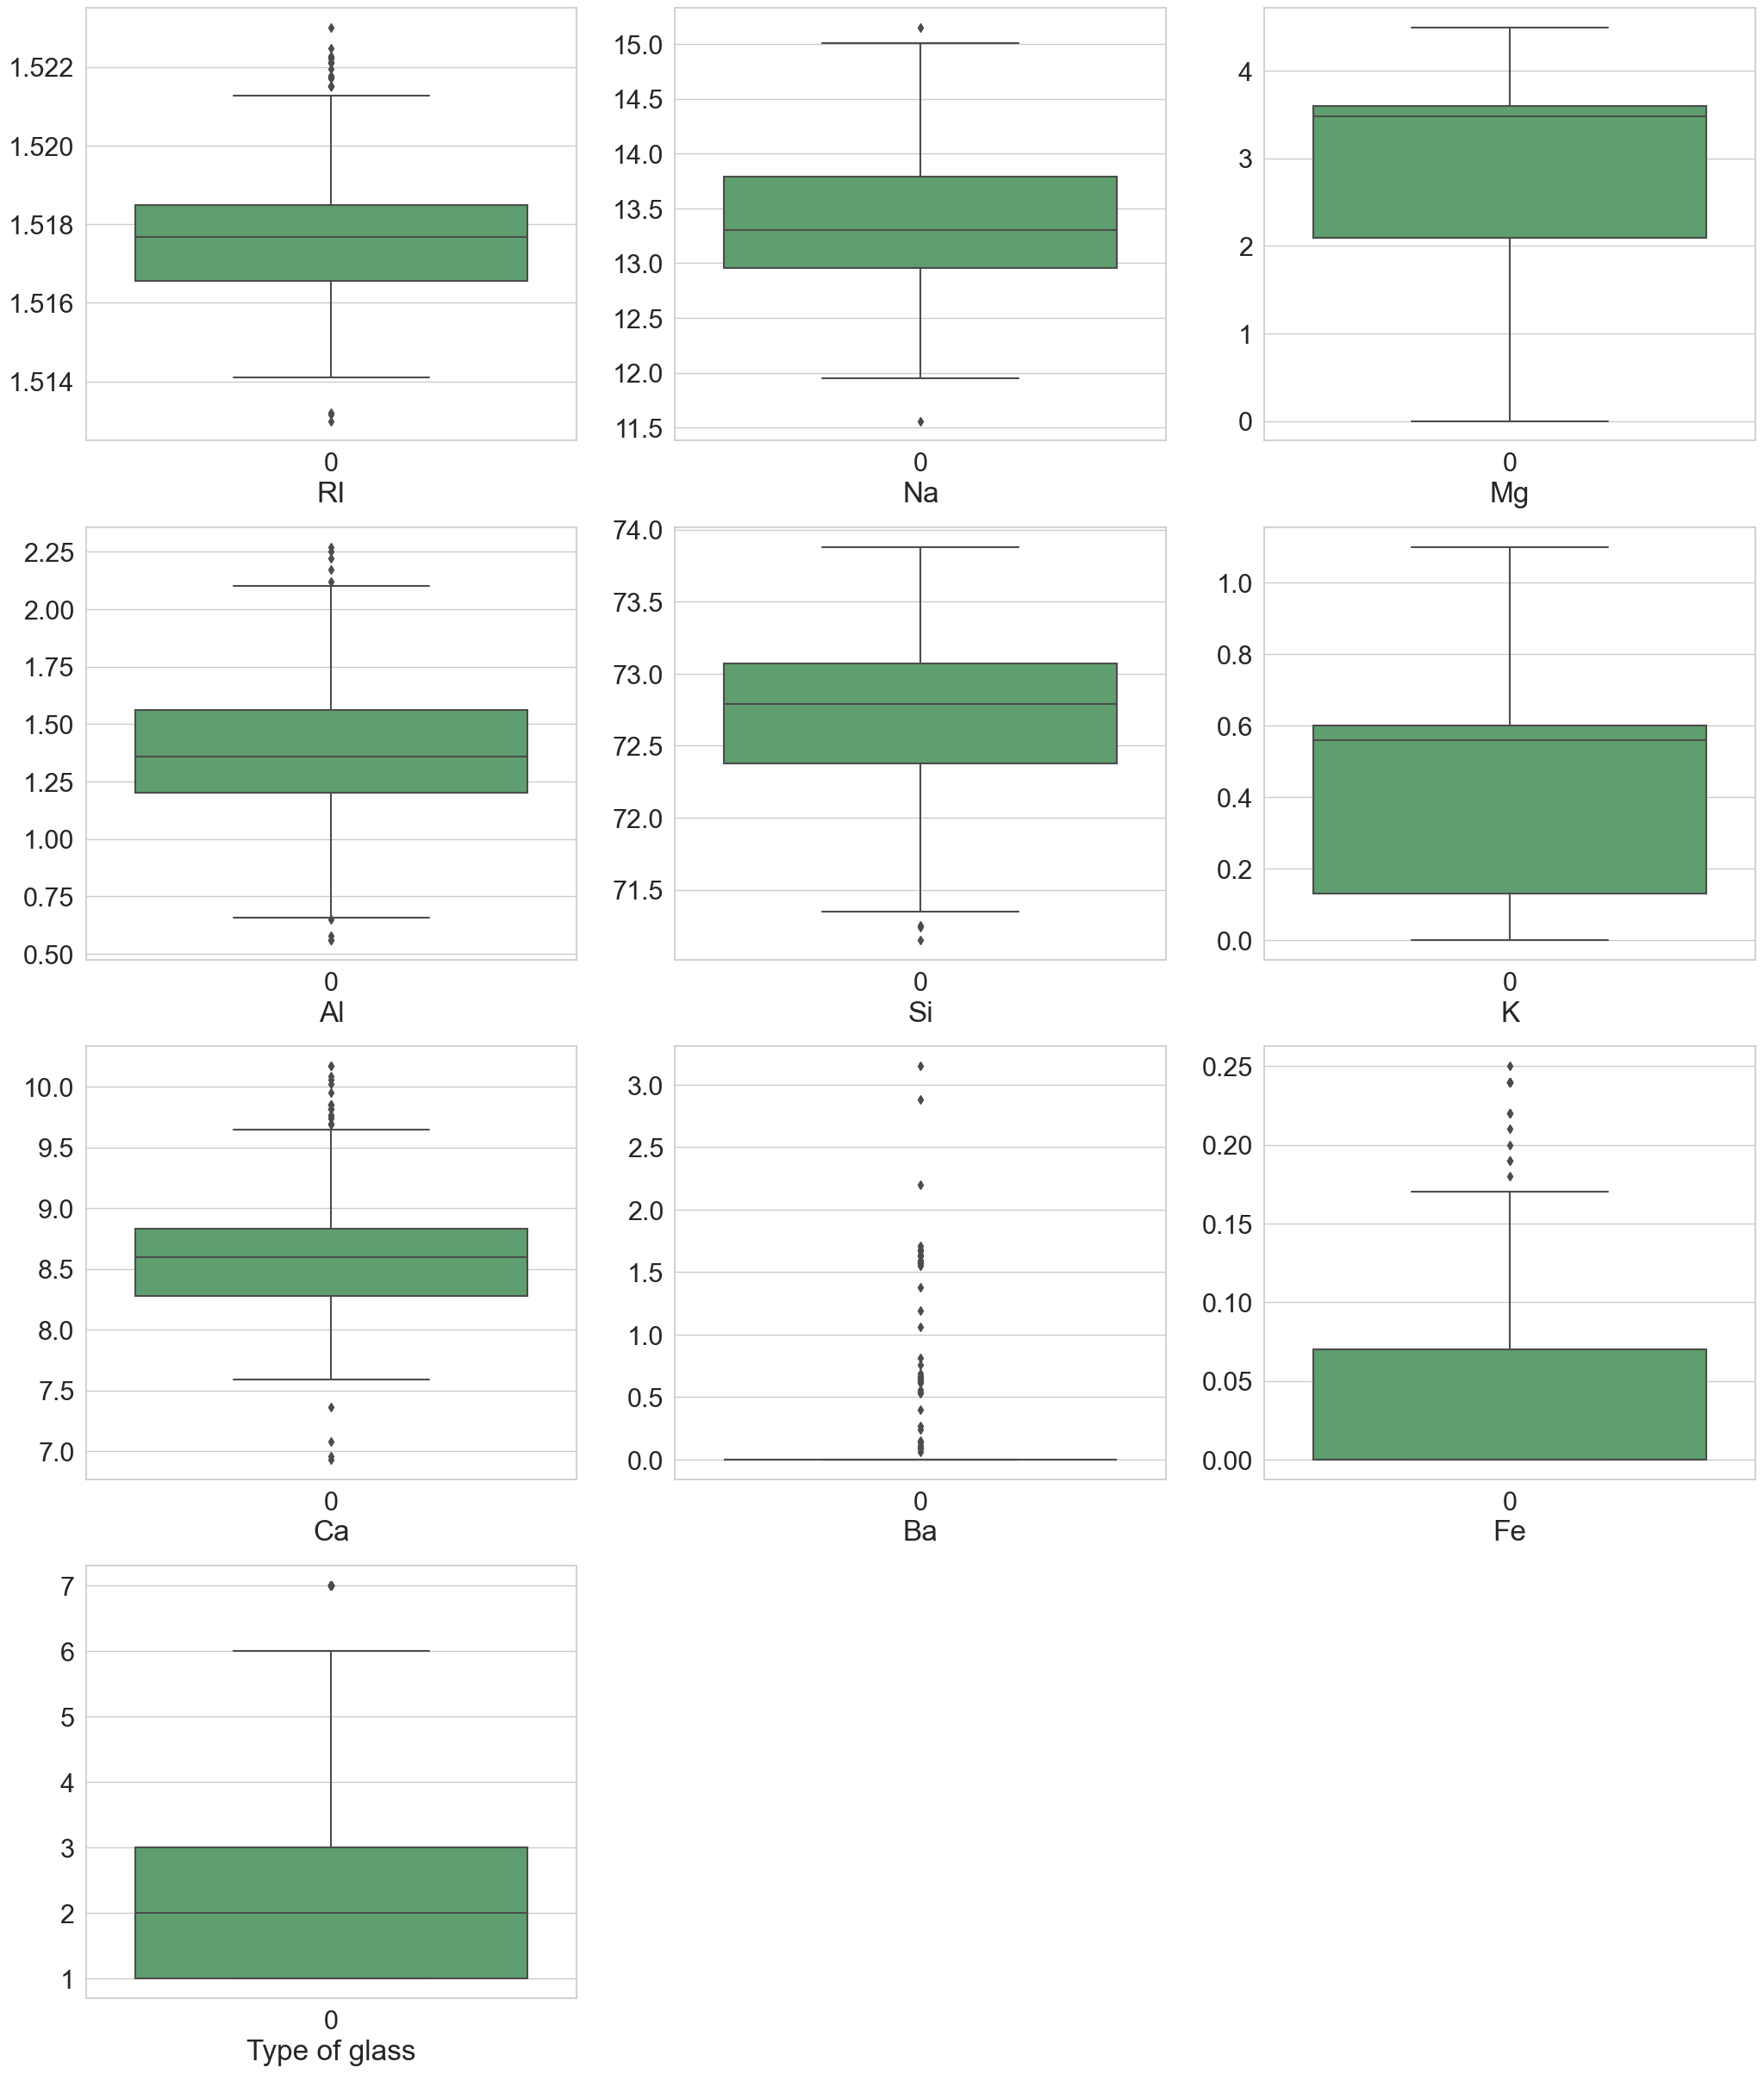

In [492]:
# visualize after remove outliers
plt.figure(figsize=(25,30))
column=1
for col in df:
    if column<=12:
        plt.subplot(4,3,column)
        sns.boxplot(out_df[col],color='g')
        plt.xlabel(col)
    column +=1
plt.show()

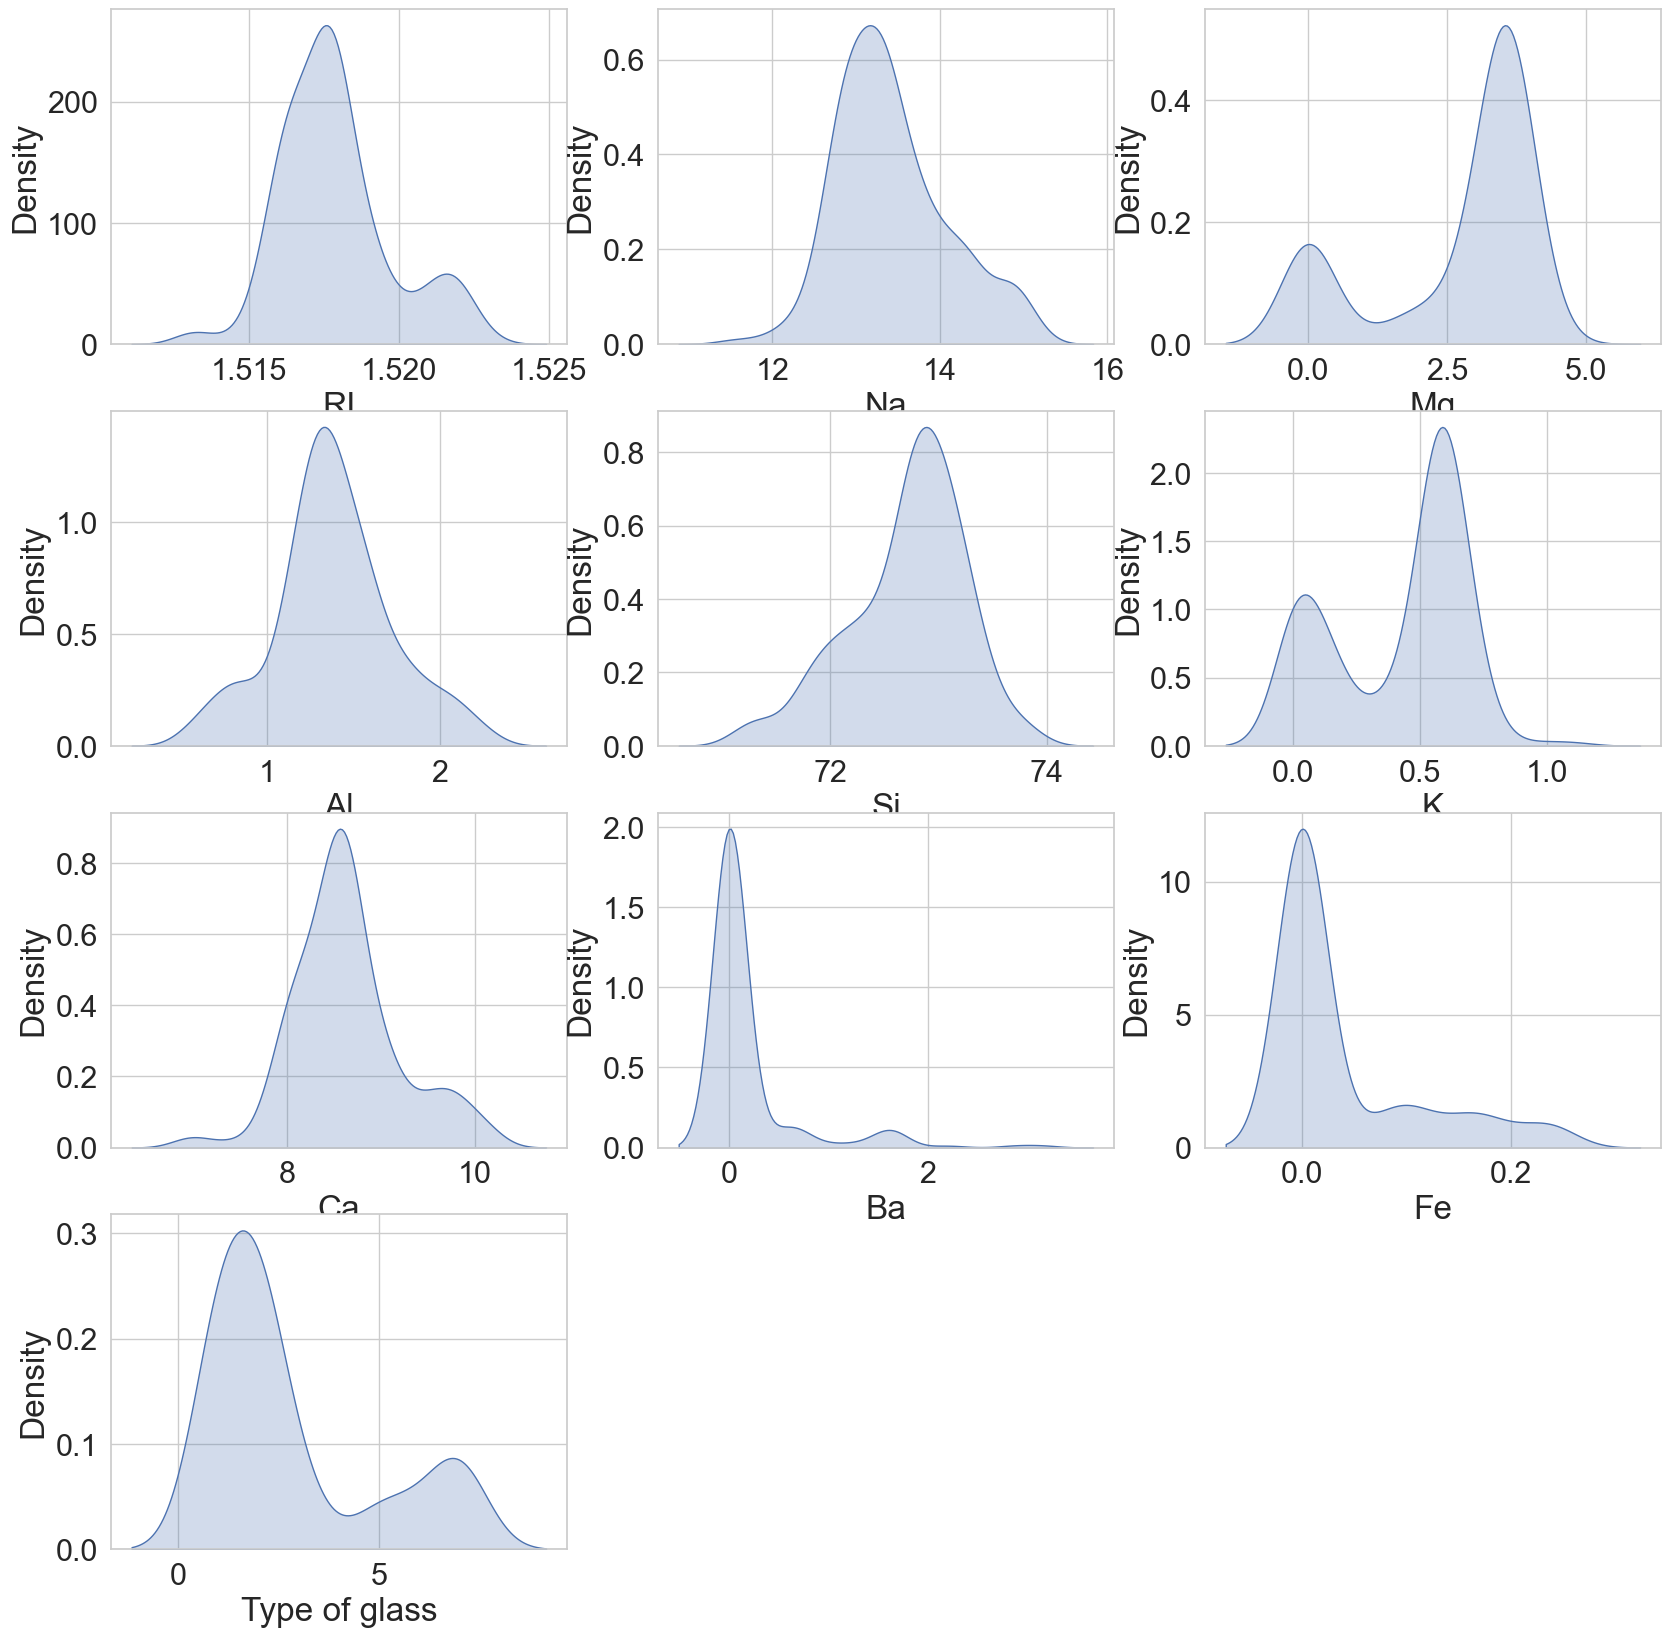

In [493]:
# Check the Skewness
plt.figure(figsize=(20,20))
column=1
for col in df:
    if column<12:
        plt.subplot(4,3,column)
        sns.kdeplot(out_df[col],shade = True)
        plt.xlabel(col)
    column +=1
plt.show()

In [494]:
# Check the skewness
out_df.skew()

RI               0.661847
Na               0.571168
Mg              -1.146096
Al               0.124436
Si              -0.649182
K               -0.498561
Ca               0.436736
Ba               3.406749
Fe               1.639043
Type of glass    1.108861
dtype: float64

# Yeo-Johnson Transformation: Can handle both positive and negative values.

In [495]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
out_df['Ba'] = pt.fit_transform(out_df[['Ba']])

In [496]:
# Cube Root Transformation: Useful for moderately skewed data.
# out_df['Fe'] = np.cbrt(out_df['Fe'])

In [497]:
out_df.skew()

RI               0.661847
Na               0.571168
Mg              -1.146096
Al               0.124436
Si              -0.649182
K               -0.498561
Ca               0.436736
Ba               1.817526
Fe               1.639043
Type of glass    1.108861
dtype: float64

In [498]:
# Check the Correlation
out_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,0.063941,0.117921,-0.337160,-0.480457,-0.226706,0.625659,-0.176628,0.030429,-0.172755
Na,0.063941,1.000000,-0.406019,0.192355,-0.218060,-0.641820,0.137529,0.528822,-0.198786,0.541603
Mg,0.117921,-0.406019,1.000000,-0.293846,-0.293819,0.487747,-0.092339,-0.548663,0.134745,-0.744195
Al,-0.337160,0.192355,-0.293846,1.000000,0.213088,0.193211,-0.281709,0.378602,-0.130834,0.439078
Si,-0.480457,-0.218060,-0.293819,0.213088,1.000000,0.122483,-0.287495,0.210989,0.023901,0.246984
K,-0.226706,-0.641820,0.487747,0.193211,0.122483,1.000000,-0.373352,-0.387906,0.069644,-0.454503
Ca,0.625659,0.137529,-0.092339,-0.281709,-0.287495,-0.373352,1.000000,0.098195,0.108241,0.109605
Ba,-0.176628,0.528822,-0.548663,0.378602,0.210989,-0.387906,0.098195,1.000000,-0.041379,0.668383
Fe,0.030429,-0.198786,0.134745,-0.130834,0.023901,0.069644,0.108241,-0.041379,1.000000,-0.223340
Type of glass,-0.172755,0.541603,-0.744195,0.439078,0.246984,-0.454503,0.109605,0.668383,-0.223340,1.000000


<Axes: >

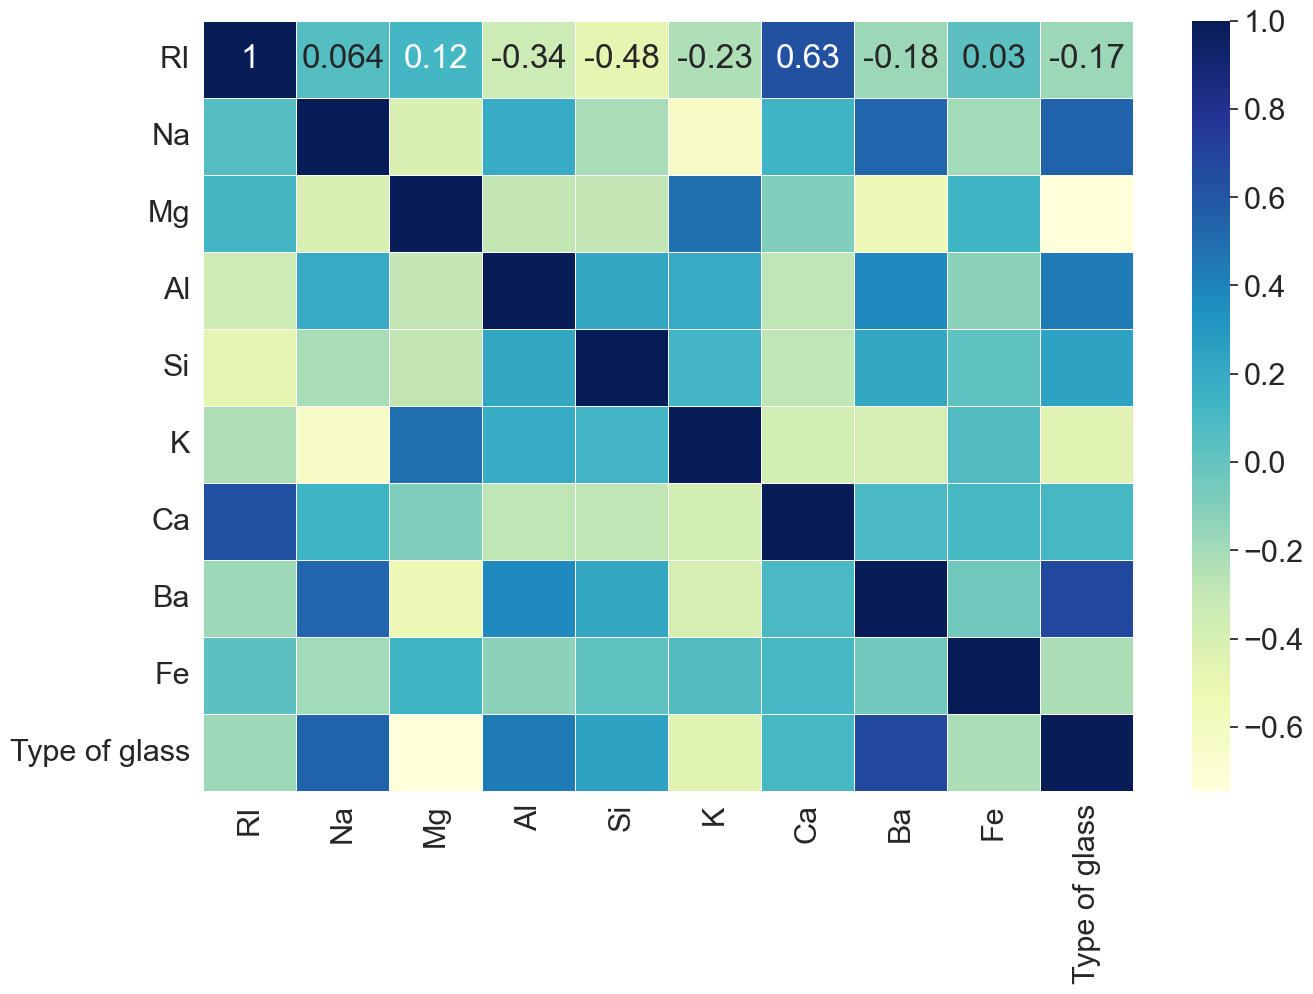

In [499]:
plt.subplots(figsize=(15,10))
sns.heatmap(out_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

In [500]:
show_cor=out_df.corr()
show_cor['Type of glass'].sort_values(ascending=False)

Type of glass    1.000000
Ba               0.668383
Na               0.541603
Al               0.439078
Si               0.246984
Ca               0.109605
RI              -0.172755
Fe              -0.223340
K               -0.454503
Mg              -0.744195
Name: Type of glass, dtype: float64

In [501]:
# drop the Ba column
out_df=out_df.drop('Ba',axis=1)

In [502]:
out_df

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,1.36,72.61,0.08,9.18,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,7


# Separate Feature and Label

In [512]:
X=out_df.drop(['Type of glass'],axis=1)
Y=out_df['Type of glass']

In [513]:
X.shape

(213, 8)

In [514]:
Y.shape

(213,)

# Feature Scaling Using Standard Scaler

In [515]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.698043,0.325522,1.257238,-0.839625,-1.747493,-1.380473,0.209564,-0.547115
1,-0.135476,0.704160,0.639311,-0.070420,0.038572,0.245131,-1.408487,-0.547115
2,-0.906632,0.158921,0.604596,0.462106,0.527390,-0.103213,-1.496424,-0.547115
3,-0.108512,-0.325735,0.701798,-0.277514,-0.187036,0.593474,-0.722574,-0.547115
4,-0.237937,-0.234862,0.653197,-0.425438,0.696596,0.516065,-0.986387,-0.547115
...,...,...,...,...,...,...,...,...
208,-0.879669,1.082798,-1.860172,-0.070420,-0.187036,-1.303063,0.965827,-0.547115
209,-0.545321,2.264148,-1.860172,1.793422,0.658995,-1.612702,-0.405999,-0.547115
210,1.503906,1.415999,-1.860172,1.882176,1.335819,-1.612702,-0.335649,-0.547115
211,-0.728673,1.446290,-1.860172,1.645498,1.693032,-1.612702,-0.265299,-0.547115


# Checking Variance Inflation Factor

In [516]:
# to handle the multicoilarity means two or more ondependent columns highly correlated to each other
from statsmodels.stats.outliers_influence import variance_inflation_factor
multicoil=pd.DataFrame()
multicoil["VIF values"]=[variance_inflation_factor(X.values,col) for col in range(len(X.columns))]
multicoil["Features"]=X.columns
multicoil

,VIF values,Features
0,2.044900,RI
1,2.366177,Na
2,1.944241,Mg
3,1.641722,Al
4,1.641175,Si
5,2.891013,K
6,1.882795,Ca
7,1.078013,Fe


# Modeling

In [518]:
# finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
Accuracy_max=0
Random_state_max=0
for random in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=random)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>Accuracy_max:
        Accuracy_max=accuracy
        Random_state_max=random
print(f"Best accuracy is: {Accuracy_max} at random_state: {Random_state_max}")


Best accuracy is: 0.890625 at random_state: 85


In [520]:
# finding the best random state
Accuracy_max=0
Random_state_max=0
for random in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=random)
    Gb=GradientBoostingClassifier()
    Gb.fit(x_train,y_train)
    pred=Gb.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>Accuracy_max:
        Accuracy_max=accuracy
        Random_state_max=random
print(f"Best accuracy is: {Accuracy_max} at random_state: {Random_state_max}")

Best accuracy is: 0.84375 at random_state: 86


In [521]:
# So here we observe that Random forest Classifier have best accuracy with 85 random state.


In [522]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=85)

In [524]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
all_model=[RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,DecisionTreeClassifier,KNN,SVC]
for model in all_model:
    obj=model()
    obj.fit(x_train,y_train)
    predict=obj.predict(x_test)
    pred_train= obj.predict(x_train)
    print(f"-------------Accuracy with {str (model)}-----------------")
    print("Accuracy :",accuracy_score(y_test,predict))
    print("Acuracy on trained data :",accuracy_score(y_train,pred_train)*100)
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))
    
    print(f"*******Check the validation Score***********")
    score=cross_val_score(obj,X_PCA_Reduced,Y,cv=10)
    print(score)
    print('val-score : ',score.mean())
    print(f"Difference between Accuracy score and cross validation score is : {accuracy_score(y_test,predict)-score.mean()}")
    print()

-------------Accuracy with <class 'sklearn.ensemble._forest.RandomForestClassifier'>-----------------
Accuracy : 0.875
Acuracy on trained data : 100.0
[[18  1  1  0  0  0]
 [ 1 23  0  0  0  0]
 [ 2  2  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0 11]]
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       0.88      0.96      0.92        24
           3       0.50      0.20      0.29         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.92      0.96        12

    accuracy                           0.88        64
   macro avg       0.82      0.83      0.81        64
weighted avg       0.86      0.88      0.86        64

*******Check the validation Score***********
[0.36363636 0.54545455 0.63636364 0.57142857 0.52380952 0.61904762
 0.80952381 0.47619048 0.71428571 0.61904762]
val-score :  0.587878

In [ ]:
'''here we observe that GradientBoostingClassifier is best accauracy both training and testing data and minimun difference with cross validation score. '''


# HyperPara Tuning with GridSearchCV

In [525]:
from sklearn.model_selection import GridSearchCV

In [526]:
parameter = {
              'loss' : ['log_loss', 'deviance', 'exponential'],
              'max_features' : ['auto', 'sqrt', 'log2'],
            'learning_rate':[0.1,0.01,0.2,0.5],
            'random_state': [69,42,0],
              'criterion' : ['friedman_mse', 'squared_error']
             }

In [527]:
gcv = GridSearchCV(GradientBoostingClassifier(),parameter,verbose=5,cv=5)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=42;, score=

[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, l

[CV 4/5] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.2, loss=log_loss, max_features=auto, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, lear

[CV 2/5] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, max_features=auto, random_state=0;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.667 total time=   0.4s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.667 total time=   0.4s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.767 total time=   0.4s
[CV 4/5] END criterion=friedman_mse, le

[CV 5/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_features=log2, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_features=auto, random_state=69;, score=nan total time=   0.0s
[CV 2/5] END criterion=squa

[CV 4/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_features=sqrt, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_features=sqrt, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_features=sqrt, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_features=sqrt, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_features=sqrt, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_features=sqrt, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_features=sqrt, random_state=0;, score=nan total time=   0.0s
[CV 1/5] END crite

[CV 3/5] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_features=log2, random_state=42;, score=0.667 total time=   0.5s
[CV 4/5] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_features=log2, random_state=42;, score=0.733 total time=   0.4s
[CV 5/5] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_features=log2, random_state=42;, score=0.621 total time=   0.5s
[CV 1/5] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_features=log2, random_state=0;, score=0.633 total time=   0.5s
[CV 2/5] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_features=log2, random_state=0;, score=0.633 total time=   0.6s
[CV 3/5] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_features=log2, random_state=0;, score=0.667 total time=   0.6s
[CV 4/5] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_features=log2, random_state=0;, score=0.667 total time=   0.5s
[CV 5/5] END crit

[CV 1/5] END criterion=squared_error, learning_rate=0.2, loss=log_loss, max_features=sqrt, random_state=69;, score=0.667 total time=   0.5s
[CV 2/5] END criterion=squared_error, learning_rate=0.2, loss=log_loss, max_features=sqrt, random_state=69;, score=0.700 total time=   0.5s
[CV 3/5] END criterion=squared_error, learning_rate=0.2, loss=log_loss, max_features=sqrt, random_state=69;, score=0.733 total time=   0.5s
[CV 4/5] END criterion=squared_error, learning_rate=0.2, loss=log_loss, max_features=sqrt, random_state=69;, score=0.667 total time=   0.5s
[CV 5/5] END criterion=squared_error, learning_rate=0.2, loss=log_loss, max_features=sqrt, random_state=69;, score=0.690 total time=   0.5s
[CV 1/5] END criterion=squared_error, learning_rate=0.2, loss=log_loss, max_features=sqrt, random_state=42;, score=0.667 total time=   0.5s
[CV 2/5] END criterion=squared_error, learning_rate=0.2, loss=log_loss, max_features=sqrt, random_state=42;, score=0.667 total time=   0.5s
[CV 3/5] END criteri

[CV 1/5] END criterion=squared_error, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.667 total time=   0.4s
[CV 2/5] END criterion=squared_error, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.667 total time=   0.4s
[CV 3/5] END criterion=squared_error, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.767 total time=   0.5s
[CV 4/5] END criterion=squared_error, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.667 total time=   0.4s
[CV 5/5] END criterion=squared_error, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=69;, score=0.690 total time=   0.4s
[CV 1/5] END criterion=squared_error, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=42;, score=0.700 total time=   0.4s
[CV 2/5] END criterion=squared_error, learning_rate=0.5, loss=log_loss, max_features=sqrt, random_state=42;, score=0.667 total time=   0.4s
[CV 3/5] END criteri

[CV 2/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, learning_rate=0.5, loss=exponential, max_features=log2, random_state=0;, score=nan total time=   0.0s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.01, 0.2, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [69, 42, 0]},
             verbose=5)

In [528]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'log_loss',
 'max_features': 'sqrt',
 'random_state': 69}

In [534]:
final_model=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.2,loss='log_loss',max_features='sqrt',random_state=69)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.8125


In [530]:
# parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
#                      'C': [0.001, 0.01, 0.1, 1, 10]}]
# grid = GridSearchCV(SVC(), parameters,verbose=5, cv=5, scoring='accuracy')
# grid.fit(x_train, y_train)
# print("Best parameters set found on development set:")
# print()
# print(grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.367 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.367 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.345 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.367 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.367 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.333 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.333 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.345 total time=   0.0s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.367 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=0.01, kerne

[CV 5/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.655 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.367 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.367 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.345 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.633 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.467 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.700 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.567 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.621 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.533 total time=   0.0s
[CV 2/5] END .......C=1, gam

In [532]:
# finall_model=SVC(kernel='rbf' , C=10,gamma=0.1 ,random_state=85)
# finall_model.fit(x_train,y_train)
# pred=finall_model.predict(x_test)
# acc=accuracy_score(y_test,pred)
# print(acc*100)

76.5625


Text(260.25, 0.5, 'predicted label')

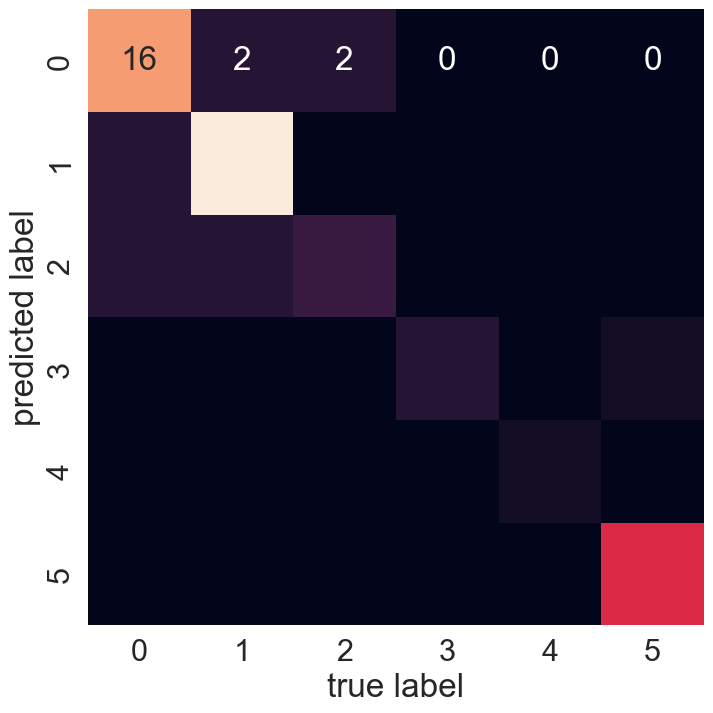

In [535]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [536]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        20
           2       0.91      0.83      0.87        24
           3       0.43      0.60      0.50         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.92      0.96        12

    accuracy                           0.83        64
   macro avg       0.80      0.86      0.82        64
weighted avg       0.85      0.83      0.84        64



# Save the model

In [537]:
import joblib
joblib.dump(final_model,'Glass Identification.pkl')

['Glass Identification.pkl']

In [538]:
# lets load the saved model and get the predictions
model=joblib.load("Glass Identification.pkl")

# prediction
prediction=model.predict(x_test)
prediction

array([2, 5, 1, 1, 2, 7, 2, 7, 7, 2, 1, 2, 2, 1, 3, 7, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 2, 7, 3, 1, 6, 7, 1, 2, 3, 3, 2, 2, 1, 7, 3, 2, 1,
       3, 7, 1, 3, 7, 7, 2, 1, 1, 2, 5, 5, 2, 1, 1, 2, 1, 7, 2, 2],
      dtype=int64)

In [539]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df 

,Predicted,Original
0,2,2
1,5,5
2,1,1
3,1,1
4,2,2
...,...,...
59,2,2
60,1,1
61,7,7
62,2,2
